In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

In [2]:
file = open('config2.json', encoding='utf-8')
config_file = json.load(file)
file.close()

In [3]:
def cleanning_data(data):
    clean = data.copy()
    sort_to = ''

    for i in config_file:
        if (config_file[i] == 'dateTime'):
            clean[i] = pd.to_datetime(clean[i], dayfirst=True)
            sort_to = i
        elif (config_file[i] == 'str'):
            clean[i] = clean[i].str.strip()
        elif (config_file[i] == 'float'):
            clean[i] = clean[i].apply(lambda x: number_cleanning(x, True))
        elif (config_file[i] == 'int'):
            clean[i] = clean[i].apply(lambda x: number_cleanning(x))

    return clean.sort_values(by=sort_to, ascending=True)

def number_cleanning(num, isFloat=False):
    thou_sep = ','
    ans = str(num).lower()
    ans = ans.replace(thou_sep, '')

    tens = dict(k='E+03', m='E+06', b='E+09')
    for word, exp in tens.items():
        ans = ans.replace(word, exp)

    regex_num = '^\D*|\D*$'
    ans = re.sub(regex_num, '', ans)

    if (isFloat):
        return float(ans)
    else:
        return int(float(ans)//1)

In [4]:
path = '../data/raw/TES 15 años.csv'
df = pd.read_csv(path, sep=',', header=0, decimal='.')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fecha     2798 non-null   object 
 1   Último    2798 non-null   float64
 2   Apertura  2798 non-null   float64
 3   Máximo    2798 non-null   float64
 4   Mínimo    2798 non-null   float64
 5   % var.    2798 non-null   object 
dtypes: float64(4), object(2)
memory usage: 131.3+ KB


In [5]:
df2 = cleanning_data(df)
df2['year'] = df2['Fecha'].dt.year
df2['month'] = df2['Fecha'].dt.month
df2['day'] = df2['Fecha'].dt.day
df2

,Fecha,Último,Apertura,Máximo,Mínimo,% var.,year,month,day
2797,2012-04-24,7.350,7.350,7.350,7.350,0.14,2012,4,24
2796,2012-04-25,7.338,7.338,7.338,7.338,0.16,2012,4,25
2795,2012-04-27,7.307,7.307,7.307,7.307,0.42,2012,4,27
2794,2012-04-30,7.330,7.330,7.330,7.330,0.31,2012,4,30
2793,2012-05-02,7.326,7.326,7.326,7.326,0.05,2012,5,2
...,...,...,...,...,...,...,...,...,...
4,2022-05-17,12.085,11.800,12.085,11.800,2.42,2022,5,17
3,2022-05-18,11.962,11.962,11.962,11.962,1.02,2022,5,18
2,2022-05-19,11.760,11.652,11.780,11.502,1.69,2022,5,19
1,2022-05-20,11.699,11.800,11.870,11.676,0.52,2022,5,20


In [6]:
df_tes_15 = df2.copy()

In [7]:
df_tes_15 = df_tes_15.set_index('Fecha')
df_tes_15.dropna(inplace=True)
df_tes_15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2798 entries, 2012-04-24 to 2022-05-23
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    2798 non-null   float64
 1   Apertura  2798 non-null   float64
 2   Máximo    2798 non-null   float64
 3   Mínimo    2798 non-null   float64
 4   % var.    2798 non-null   float64
 5   year      2798 non-null   int64  
 6   month     2798 non-null   int64  
 7   day       2798 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 196.7 KB


In [8]:
df_tes_15.describe()

,Último,Apertura,Máximo,Mínimo,% var.,year,month,day
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000
mean,7.268354,7.268758,7.275402,7.261530,1.085911,2016.810936,6.458542,15.841673
std,1.920061,1.922973,1.927559,1.917988,22.138380,2.883942,3.418320,8.745372
min,5.129000,5.129000,5.129000,5.129000,0.000000,2012.000000,1.000000,1.000000
25%,6.700250,6.700250,6.709250,6.700000,0.110000,2014.000000,3.000000,8.000000
50%,7.127000,7.128000,7.129000,7.123000,0.400000,2017.000000,7.000000,16.000000
75%,7.660750,7.670000,7.679750,7.660000,0.850000,2019.000000,9.000000,23.000000
max,95.289000,95.483000,95.638000,95.289000,1167.140000,2022.000000,12.000000,31.000000


For an initial analysis it is possible to observe some basic statistical data that give a general context of
the information to analyze

## Plotting Tes Trend and Returns

Based on the economic context of the data, the variables that are of greatest interest to analyze
the performance of Tes 15 years value are the closing price because it shows the final daily valuation
and the returns that allow us to visualize the rate of change of action from day to day.


''

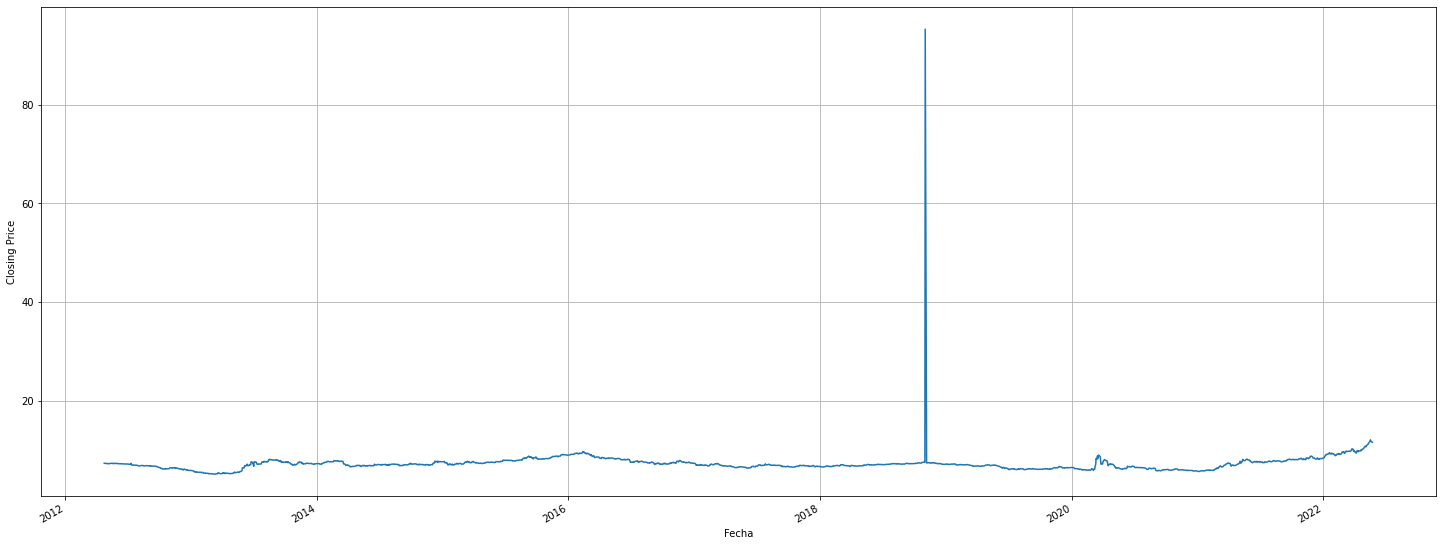

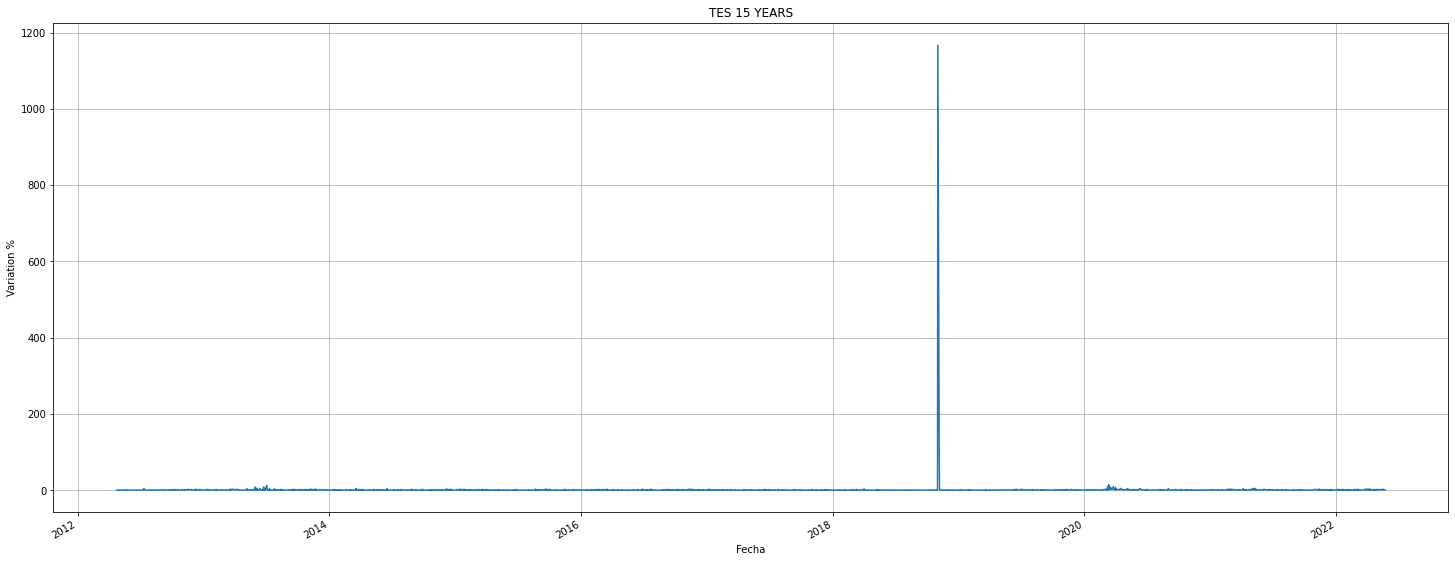

In [9]:
ax1 = df_tes_15.plot(use_index=True, y='Último', style=['-'], figsize=(25,10), ylabel='Closing Price', legend=False, grid=True)
ax2 = df_tes_15.plot(use_index=True, y='% var.', style=['-'], figsize=(25,10), ylabel='Variation %', legend=False, grid=True)


plt.title('TES 15 YEARS')

;

A general upward trend can be observed with a significant drawdown period between approximately
2017 and 2022. It is possible ot see the impact of the covid 19 crisis in 2020 and a significant rebound
in 2021.
Regarding the variation, it can be seen that it moves in a similar range, except for some critical points highlighted, such as the impact on the stock market caused by the health covid 19 emergency and also before the year 2014 a period of high volatility can be observed

## Dotted Plot

Given that the dataset has a daily variation and we have a dataset that covers a period of 10 years,
a dotted graph allows us to see in a little more detail the gap between one sample and the other
for both the closing price and the price. variation

''

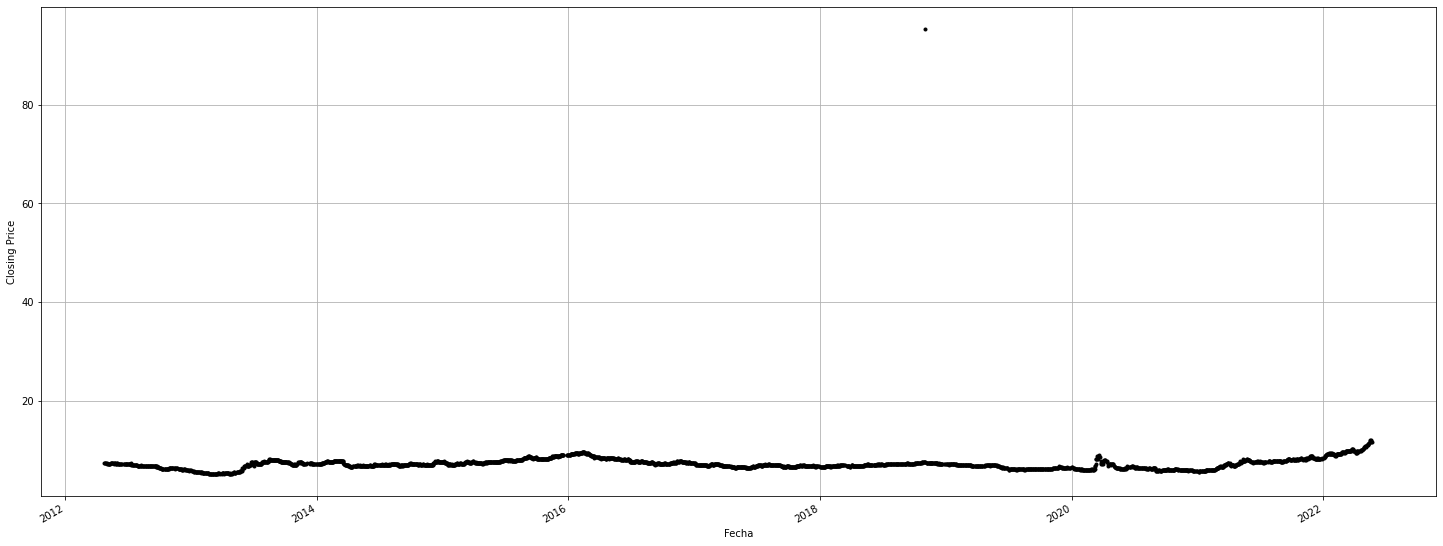

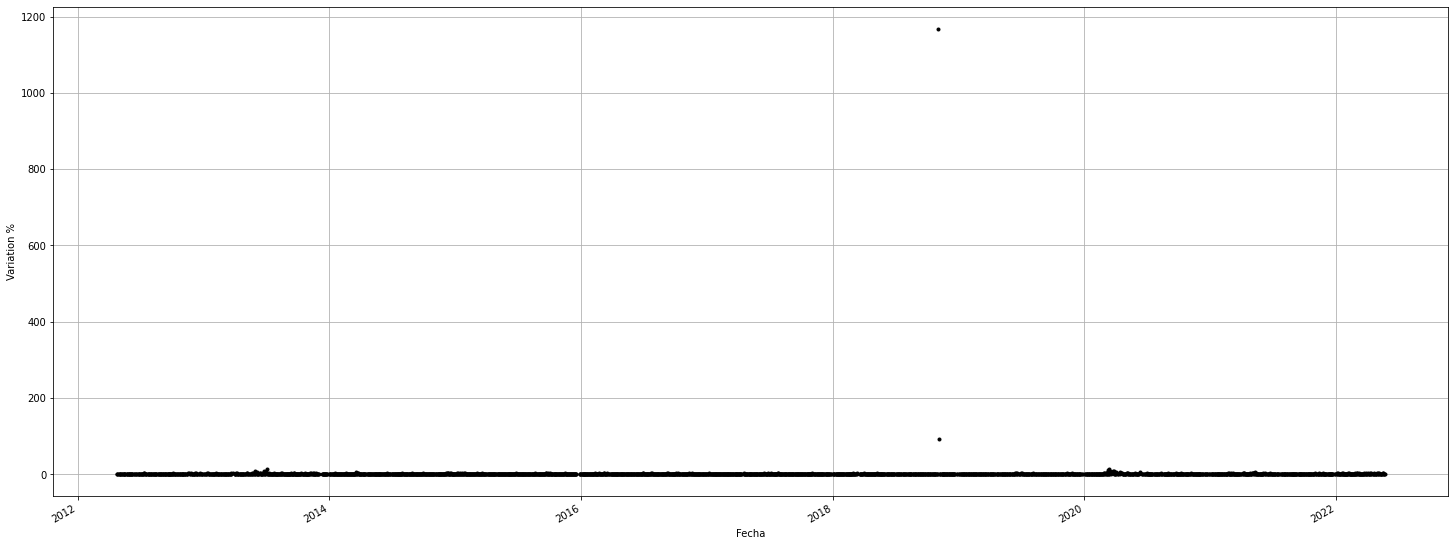

In [10]:
plt.figure()
ax3 = df_tes_15['Último'].plot(style='k.', grid=True, figsize=(25,10), ylabel='Closing Price')
plt.figure()
ax4 = df_tes_15['% var.'].plot(style='k.', grid=True, figsize=(25,10), ylabel='Variation %')



;

## Histogram of Prices and Returns

Another valuable analysis is knowing the distribution of our variables. One of the most common
ways is through a histogram that evaluates and graphically represents the frequency of the data.
The price for its variation does not present a normal distribution. However, from these data it can
be deduced that the control point (higher frequency) is approximately 7 points. 
On the other hand, the variation presents an apparently normal distribution with some very extreme
points reaching below -0.05% and almost 0.10%

''

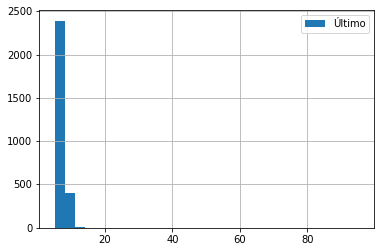

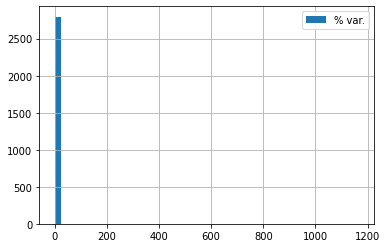

In [11]:
plt.figure()
ax5 = df_tes_15['Último'].hist(bins=30, legend=True)

plt.figure()
ax6 = df_tes_15['% var.'].hist(bins=50, legend=True)

;

## Kernel Density Plot

Continuing with the previous analysis, a better way to understand the behavior of the price and
the variation is by analyzing its density, which by smoothing some data gives us an idea of the
prices or variations where the confluence has been greater

''

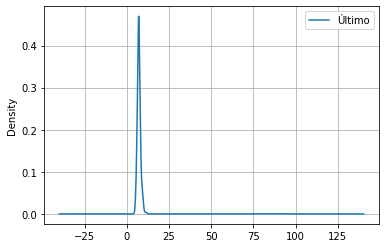

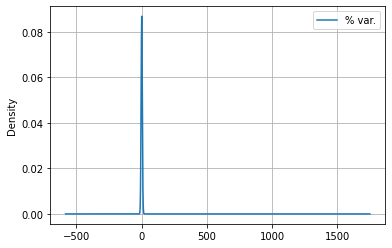

In [12]:
plt.figure()
ax6 = df_tes_15['Último'].plot(kind='kde', grid=True, legend=True)
plt.figure()
ax6 = df_tes_15['% var.'].plot(kind='kde', grid=True, legend=True)

;

## Plotting Moving Average

Another useful strategy to analyze time series is to reduce the variation of the data by applying
filters. A first approximation that we present is through a simple moving average comprised of a
window of 200 periods that presents the average evolution of the price based on the previous 200
data. A window of 200 is used because it is an industry standard measure and is used by many
institutions to assess the value of stocks.

''

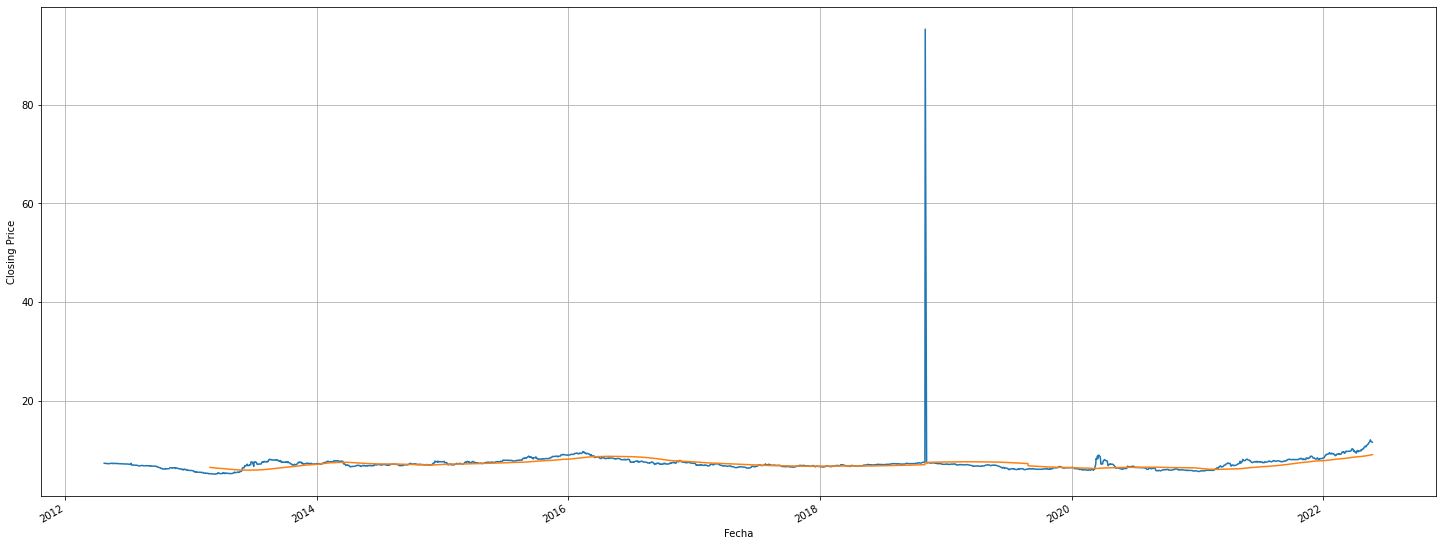

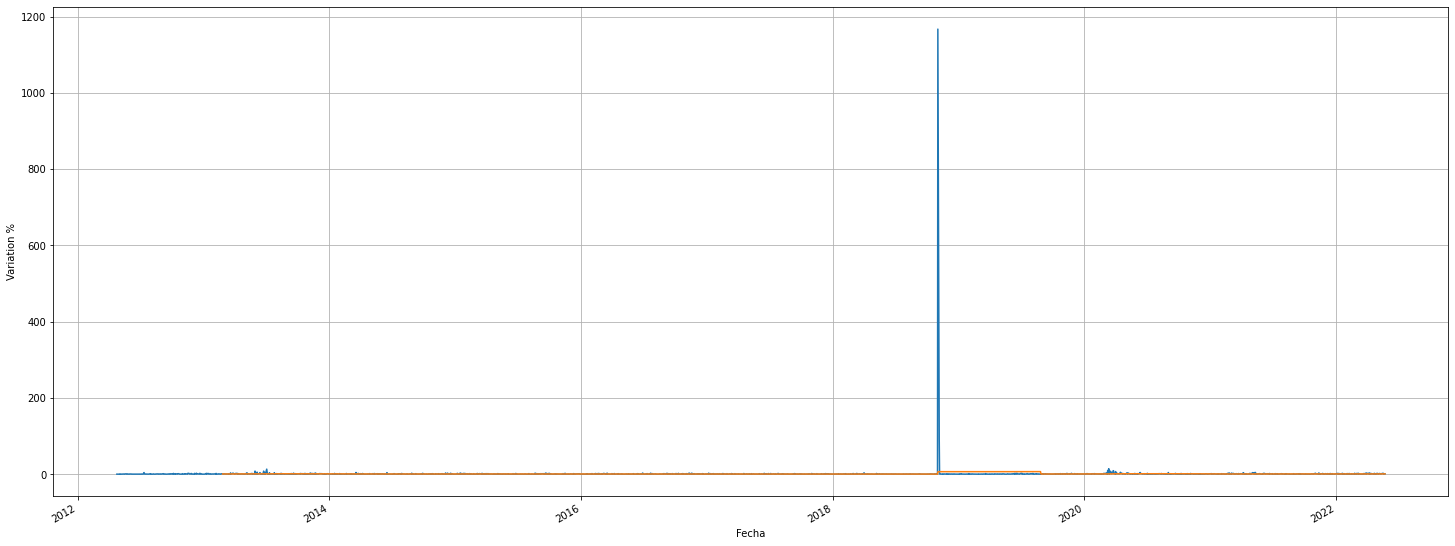

In [13]:
ax1 = df_tes_15.plot(use_index=True, y='Último', style=['-'], figsize=(25,10), ylabel='Closing Price', legend=False, grid=True)
price_mean = df_tes_15.sort_index()['Último'].rolling(200, win_type=None).mean()
price_mean.plot(style=['-', '--', ':'], grid=True, ylabel='Closing Price')

ax22 = df_tes_15.plot(use_index=True, y='% var.', style=['-'], figsize=(25,10), ylabel='Variation %', legend=False, grid=True)
price_mean = df_tes_15.sort_index()['% var.'].rolling(200, win_type=None).mean()
price_mean.plot(style=['-', '--', ':'], grid=True, ylabel='Variation %')

;

## Exponential Smoothing

Since the ultimate goal is to make a prediction model, it is important to reduce the variation of the
variable by smoothing it, however, a linear alternative such as the moving average usually generates
time shifts in the data, so non-linear options such as the exponential smoothing allows noise to be
smoothed without time shift implications


/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


''

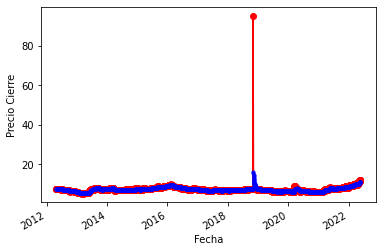

In [14]:
model = SimpleExpSmoothing(df_tes_15['Último']).fit(smoothing_level=.1, optimized=True)

df_tes_15['Último'].plot(marker='o', color='red', ylabel='Precio Cierre')
model.fittedvalues.plot(marker='.', color='blue')

;


## Lag Plot 

It is used to check if the series is random or not. Lag plot allows to do a price analysis between the observation of the sample in *t* and *t+1* where it is tried to verify if there is any pattern that shows that the series is not random, in other words to verify the existence of correlation between the samples.

 In the case of the closing price of the TES 15 years, there is a positive correlation, which finally implies that its behavior can be modeled.
 A structure can then be observed that invites us to think of a linear trend in the evolution of the price.

''

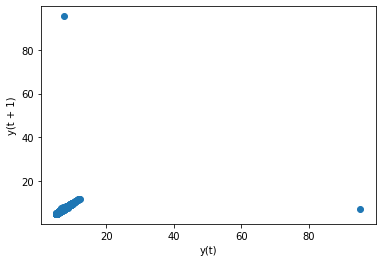

In [15]:
lag_plot(df_tes_15['Último'])

;

## Autocorrelation Plot

Autocorrelation plots are a commonly-used tool for checking randomness in a data set. This
randomness is ascertained by computing autocorrelations for data values at varying time lags. If
random, such autocorrelations should be near zero for any and all time-lag separations. If nonrandom, then one or more of the autocorrelations will be significantly non-zero.
Reinforcing the previous conclusion, it can be seen that the correlation of the data is notably far
from zero in several segments, so the variable of the closing value of the tes does not have a random component that
predominates its evolution over time.


''

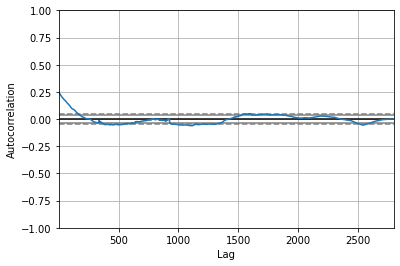

In [16]:
autocorrelation_plot(df_tes_15['Último'])

;

## Yearly value and volatility trend (seasonal plot)

In [17]:
df_tes_15.reset_index(inplace=True)
z = pd.DataFrame(df_tes_15.groupby(by = ['year', 'month'])['Último'].mean())
z.reset_index(inplace=True)
z.set_index('month', inplace=True)


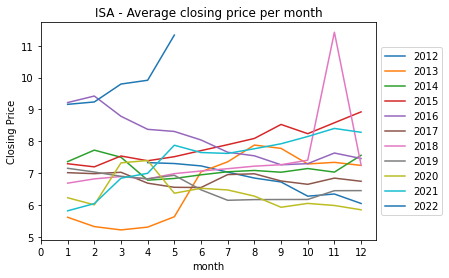

In [18]:
import numpy as np
for i in z['year'].unique():
    z[z['year'] == i]['Último'].plot(label=i)

    

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Closing Price')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.xticks(np.arange(0, 13, 1))
plt.title('ISA - Average closing price per month')
plt.show()



There is no clear pattern in the average price trend. There are years where through the months the price has been a bit flat, has fallen or has appreciated a bit.

It is not very obvious to draw a precise deduction, since the behaviors are scattered, although somehow the performances seem to find a balance between approximately 6 and 8 points.


In [19]:
w = pd.DataFrame(df_tes_15.groupby(by = ['year', 'month'])['% var.'].mean())
w.reset_index(inplace=True)
w.set_index('month', inplace=True)



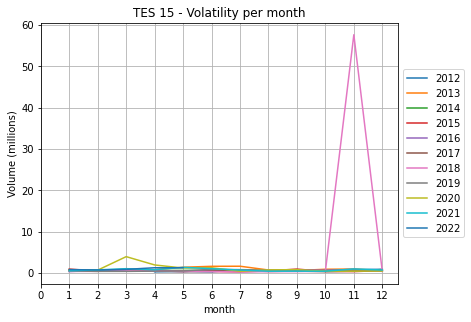

In [20]:
import numpy as np
for i in w['year'].unique():
    w[w['year'] == i]['% var.'].plot(label=i)

    

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Volume (millions)')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.xticks(np.arange(0, 13, 1))
plt.title('TES 15 - Volatility per month')
plt.grid()
plt.show()

It is also a bit difficult to identify consistent volatility behaviors according to a month-year grouping. However, there seems to be a strong confluence between -0.02% and 0.02%

''

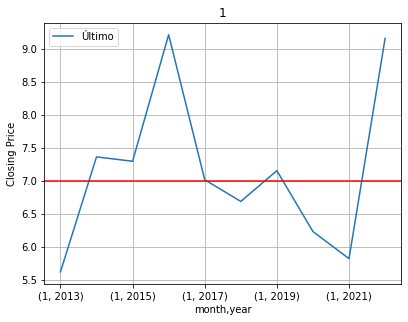

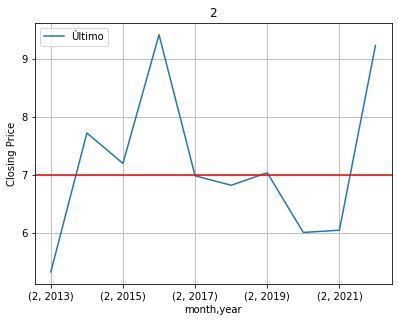

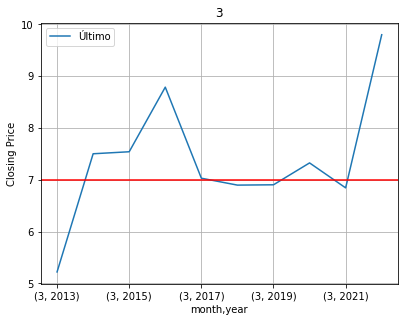

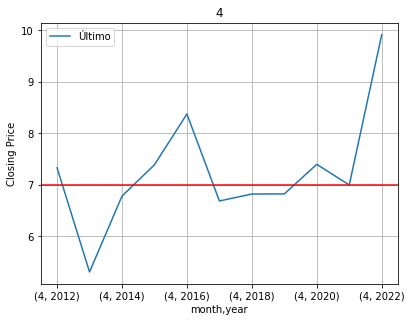

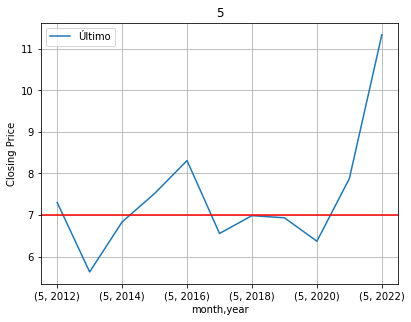

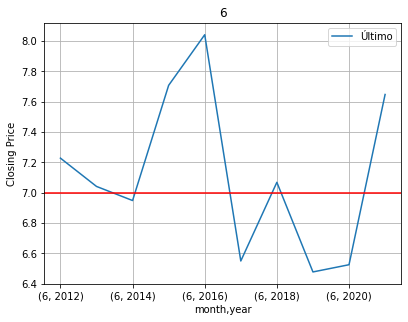

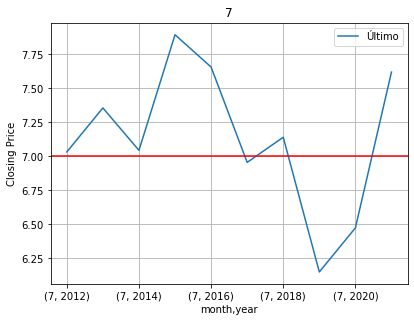

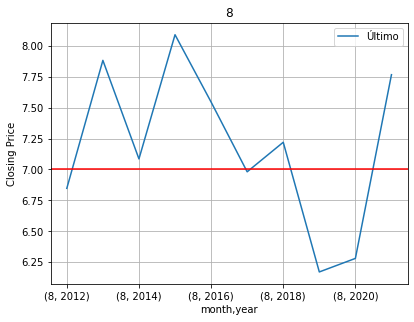

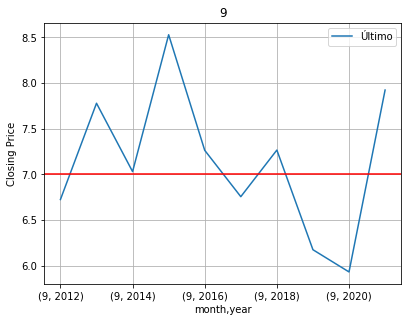

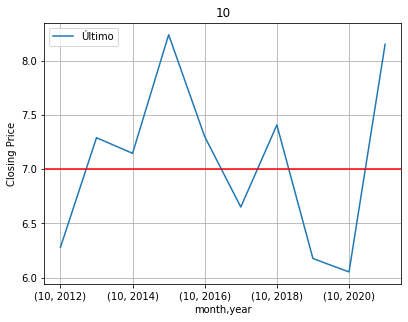

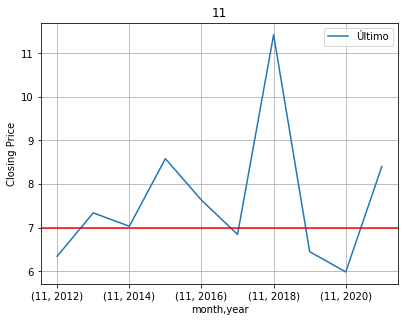

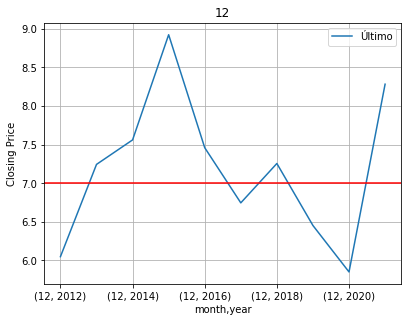

In [21]:
x = z.copy()
x.reset_index(inplace=True)
x.set_index(["month", "year"], inplace=True)
x.sort_index(inplace=True)

for i in range(1, 13, 1):
    x[np.in1d(x.index.get_level_values(0), [i])].plot(label=i)
    plt.axhline(int(x[np.in1d(x.index.get_level_values(0), [i])].mean()),color="red")
    plt.grid()
    plt.ylabel('Closing Price')
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    plt.title(i)


;

A pattern can be observed in the behavior of the share price in the respective
months of the different years. There is an increase in value
for each of the periods, and this is preceded by a
recoil. In general, the company shows consistency in growth,
red line is the average of the prices and an average
similar around 7 points which is consistent with the price of the point
of control mentioned in the previous points

In [23]:
df2.head(2)

,Fecha,Último,Apertura,Máximo,Mínimo,% var.,year,month,day
2797,2012-04-24,7.350,7.350,7.350,7.350,0.14,2012,4,24
2796,2012-04-25,7.338,7.338,7.338,7.338,0.16,2012,4,25


In [24]:
df_out = pd.DataFrame()
df_out['Date'] = pd.to_datetime(df2['Fecha'])
df_out['Instrument Name'] = 'TES15'
df_out['Year'] = df_out['Date'].dt.year
df_out['Month'] = df_out['Date'].dt.month
df_out['Day'] = df_out['Date'].dt.day
df_out['Open'] = df2['Apertura']
df_out['High'] = df2['Máximo']
df_out['Low'] = df['Mínimo']
df_out['Close'] = df2['Último']
df_out['Close previous'] = df2['Último'].shift(1)
df_out['Variation'] = df2['Último'].pct_change()*100.0
df_out = df_out.set_index('Date').dropna()
df_out

,Instrument Name,Year,Month,Day,Open,High,Low,Close,Close previous,Variation
Date,,,,,,,,,,
2012-04-25,TES15,2012,4,25,7.338,7.338,7.338,7.338,7.350,-0.163265
2012-04-27,TES15,2012,4,27,7.307,7.307,7.307,7.307,7.338,-0.422458
2012-04-30,TES15,2012,4,30,7.330,7.330,7.330,7.330,7.307,0.314767
2012-05-02,TES15,2012,5,2,7.326,7.326,7.326,7.326,7.330,-0.054570
2012-05-03,TES15,2012,5,3,7.260,7.260,7.260,7.260,7.326,-0.900901
...,...,...,...,...,...,...,...,...,...,...
2022-05-17,TES15,2022,5,17,11.800,12.085,11.800,12.085,11.800,2.415254
2022-05-18,TES15,2022,5,18,11.962,11.962,11.962,11.962,12.085,-1.017791
2022-05-19,TES15,2022,5,19,11.652,11.780,11.502,11.760,11.962,-1.688681


In [26]:
path_out = '../data/dev/TES 15 años.csv'
df_out.to_csv(path_out, encoding='utf-8')